## Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


#### Importing the dataset and and checking missing values and column types

In [2]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Visualizing the distributions of features 

Gender
Female    112
Male       88
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

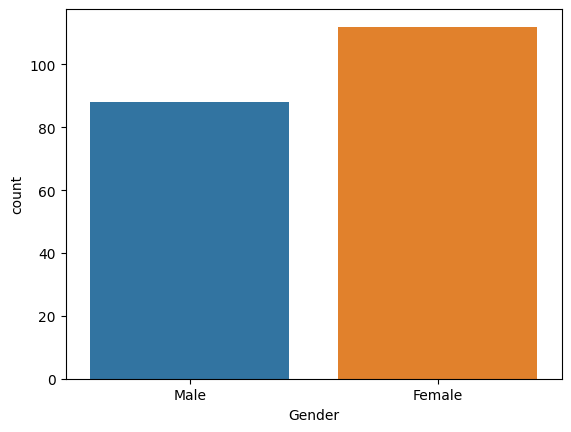

In [6]:
print(df["Gender"].value_counts())
sns.countplot(data=df,x="Gender")

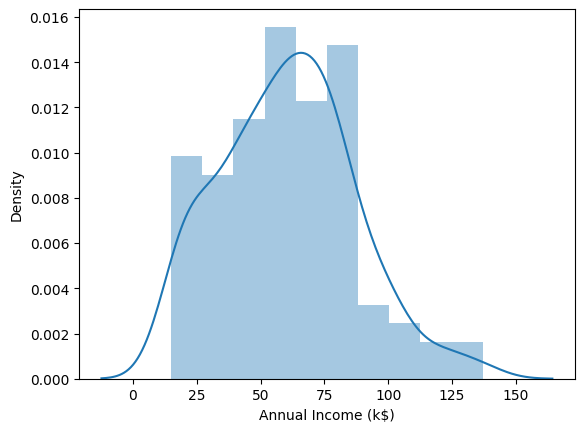

In [7]:
sns.distplot(df["Annual Income (k$)"]) 
plt.show()



<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

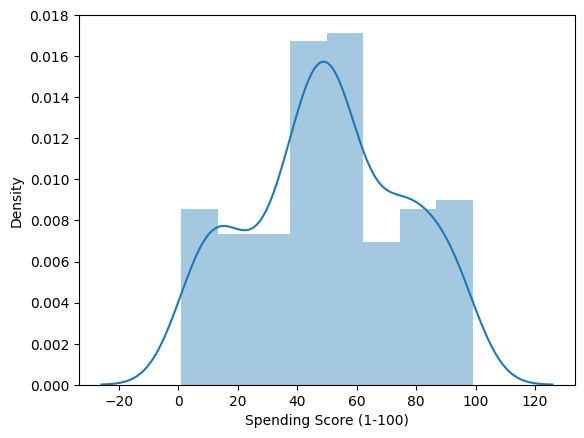

In [8]:
sns.distplot(df["Spending Score (1-100)"])

#### Visualizing the Relationship between different features

<Axes: xlabel='Annual Income (k$)', ylabel='Gender'>

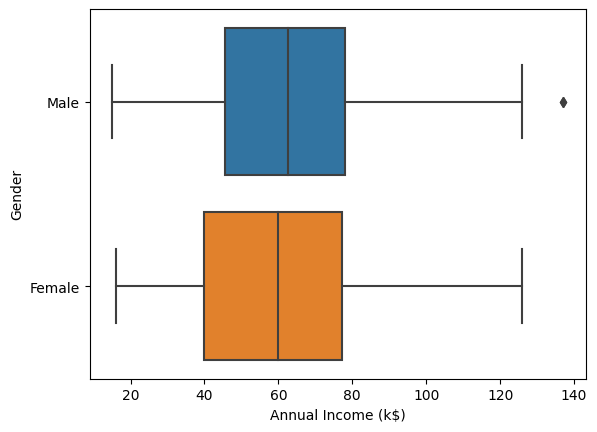

In [9]:
sns.boxplot(data=df,x="Annual Income (k$)",y="Gender")

<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

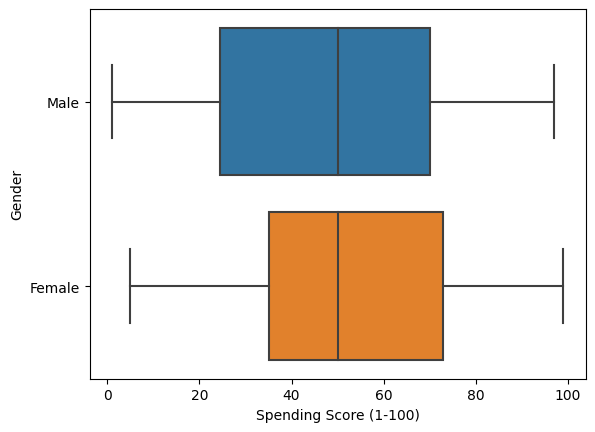

In [10]:
sns.boxplot(data=df,x="Spending Score (1-100)",y="Gender")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

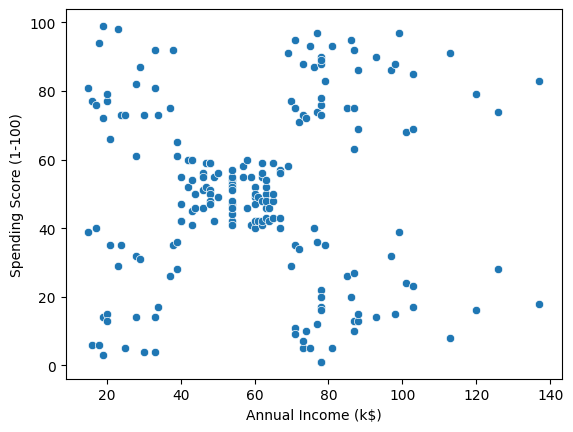

In [11]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

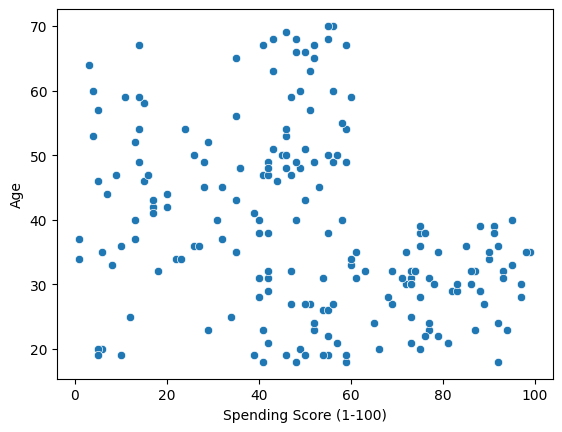

In [12]:
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Age")

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

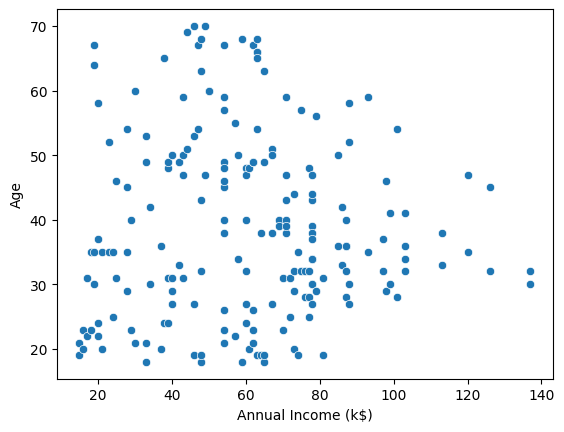

In [13]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Age")

#### Preparing the data for clustering and implementing Kmeans clustering 

In [14]:
gen={"Male":1,"Female":0}
df["Gender"]=df["Gender"].map(gen)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
x=df[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [16]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [17]:
print(model.labels_)
print(model.cluster_centers_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]]


#### Visualizing the clusters predicted by model 

Text(0.5, 1.0, 'K Mean Clustering')

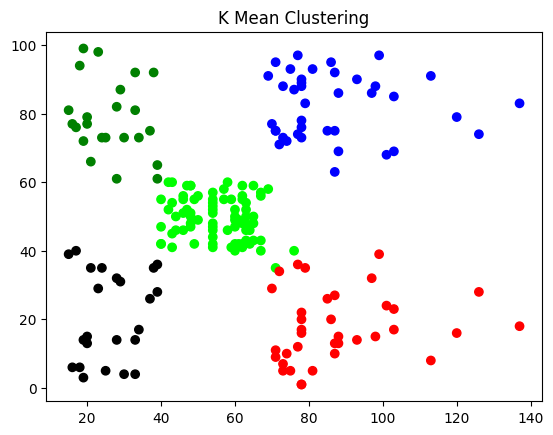

In [18]:
colormap=np.array(["red","lime","blue","green","black"])

# Plotting the Original Classifications
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=colormap[model.labels_])
plt.title('K Mean Clustering')

##### The model has generated total of 5 clusters .We have seen 5 clusters before also on the basis of Income and score during visualization of scatter plot between Income and score